<a href="https://colab.research.google.com/github/c4bath/cf820/blob/main/cfMod4Dec2v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import numpy as np
from sklearn import model_selection, metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV, SelectKBest, chi2
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import time
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import make_scorer
import scipy.stats
from scipy import interp
import statsmodels.formula.api as smf
#from scipy.stats import chi2_contingency
#from scipy.stats import chi2
from itertools import product


In [ ]:
# The csv file is in my google drive and shared with anyone with the link 

# The file is also available at: https://www.kaggle.com/datasets/sadiaanzum/patient-survival-prediction-dataset

# Per Kaggle: source of the dataset: https://journals.lww.com/ccmjournal/Citation/2019/01001/33__THE_GLOBAL_OPEN_SOURCE_SEVERITY_OF_ILLNESS.36.aspx

# Please see Data_Dictionary.csv file for explanation / definitions of features 

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# copying shortcut into end user's own google drive will enable access 
data=pd.read_csv(r'/content/drive/MyDrive/820PublicData/PatSurvRaw.csv',header=0)

In [ ]:
pd.options.display.min_rows = 186
data.isnull().sum()

encounter_id                         0
patient_id                           0
hospital_id                          0
hospital_death                       0
age                               4228
bmi                               3429
elective_surgery                     0
ethnicity                         1395
gender                              25
height                            1334
hospital_admit_source            21409
icu_admit_source                   112
icu_id                               0
icu_stay_type                        0
icu_type                             0
pre_icu_los_days                     0
readmission_status                   0
weight                            2720
albumin_apache                   54379
apache_2_diagnosis                1662
apache_3j_diagnosis               1101
apache_post_operative                0
arf_apache                         715
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache        

In [ ]:
# Eliminate features that: 
# 1. do not provide any information value (i.e. 'encounter_id', 'patient_id', 'hospital_id') 
# 2. are the predicted probabilities from the APACHE IV model ('apache_4a_hospital_death_prob','apache_4a_icu_death_prob') 
# 3. OR are not of interest in our prediction and analysis (the physiological measures, i.e. 'bilirubin_apache','bun_apache','creatinine_apache', etc)
data.drop(['encounter_id','patient_id','readmission_status','hospital_id','icu_id','albumin_apache','apache_2_diagnosis','apache_3j_diagnosis','apache_post_operative','arf_apache','bilirubin_apache','bun_apache','creatinine_apache','fio2_apache','glucose_apache','heart_rate_apache','hematocrit_apache','map_apache','paco2_apache','paco2_for_ph_apache','pao2_apache','ph_apache','resprate_apache','sodium_apache','temp_apache','urineoutput_apache','wbc_apache','d1_diasbp_invasive_max','d1_diasbp_invasive_min','d1_diasbp_max','d1_diasbp_min','d1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min','d1_heartrate_max','d1_heartrate_min','d1_mbp_invasive_max','d1_mbp_invasive_min','d1_mbp_max','d1_mbp_min','d1_mbp_noninvasive_max','d1_mbp_noninvasive_min','d1_resprate_max','d1_resprate_min','d1_spo2_max','d1_spo2_min','d1_sysbp_invasive_max','d1_sysbp_invasive_min','d1_sysbp_max','d1_sysbp_min','d1_sysbp_noninvasive_max','d1_sysbp_noninvasive_min','d1_temp_max','d1_temp_min','h1_diasbp_invasive_max','h1_diasbp_invasive_min','h1_diasbp_max','h1_diasbp_min','h1_diasbp_noninvasive_max','h1_diasbp_noninvasive_min','h1_heartrate_max','h1_heartrate_min','h1_mbp_invasive_max','h1_mbp_invasive_min','h1_mbp_max','h1_mbp_min','h1_mbp_noninvasive_max','h1_mbp_noninvasive_min','h1_resprate_max','h1_resprate_min','h1_spo2_max','h1_spo2_min','h1_sysbp_invasive_max','h1_sysbp_invasive_min','h1_sysbp_max','h1_sysbp_min','h1_sysbp_noninvasive_max','h1_sysbp_noninvasive_min','h1_temp_max','h1_temp_min','d1_albumin_max','d1_albumin_min','d1_bilirubin_max','d1_bilirubin_min','d1_bun_max','d1_bun_min','d1_calcium_max','d1_calcium_min','d1_creatinine_max','d1_creatinine_min','d1_glucose_max','d1_glucose_min','d1_hco3_max','d1_hco3_min','d1_hemaglobin_max','d1_hemaglobin_min','d1_hematocrit_max','d1_hematocrit_min','d1_inr_max','d1_inr_min','d1_lactate_max','d1_lactate_min','d1_platelets_max','d1_platelets_min','d1_potassium_max','d1_potassium_min','d1_sodium_max','d1_sodium_min','d1_wbc_max','d1_wbc_min','h1_albumin_max','h1_albumin_min','h1_bilirubin_max','h1_bilirubin_min','h1_bun_max','h1_bun_min','h1_calcium_max','h1_calcium_min','h1_creatinine_max','h1_creatinine_min','h1_glucose_max','h1_glucose_min','h1_hco3_max','h1_hco3_min','h1_hemaglobin_max','h1_hemaglobin_min','h1_hematocrit_max','h1_hematocrit_min','h1_inr_max','h1_inr_min','h1_lactate_max','h1_lactate_min','h1_platelets_max','h1_platelets_min','h1_potassium_max','h1_potassium_min','h1_sodium_max','h1_sodium_min','h1_wbc_max','h1_wbc_min','d1_arterial_pco2_max','d1_arterial_pco2_min','d1_arterial_ph_max','d1_arterial_ph_min','d1_arterial_po2_max','d1_arterial_po2_min','d1_pao2fio2ratio_max','d1_pao2fio2ratio_min','h1_arterial_pco2_max','h1_arterial_pco2_min','h1_arterial_ph_max','h1_arterial_ph_min','h1_arterial_po2_max','h1_arterial_po2_min','h1_pao2fio2ratio_max','h1_pao2fio2ratio_min','apache_4a_hospital_death_prob','apache_4a_icu_death_prob'],axis =1, inplace = True)

In [ ]:
def analyse_df(df, corr_limit = 0.75):
    """Analyse any dataframe and print results
    * Print df Shape, duplicate rows qnt, memory usage, data types and call DataFrame.describe()
    * Check Missing values in each columns, returning qnt. and percentage 
    * Check Linear Correlation between columns, return Pearson number

    Keyword arguments:
    df -- Any DataFrame
    corr_limit -- Correlation Limit (Pearson) to define if relationship exists (default 0.75)
    """   

    print('General Info:')
    print(f'{df.shape[0]} Rows {df.shape[1]} Columns'
          f'\n{df.duplicated().sum()} Duplicated Rows'
          f'\nMemory Usage: {df.memory_usage().sum()/(1024*1024):.2f}Mb')
    
    # Checking Data Types
    int_list, float_list,object_list,bool_list,other_list =[[] for i in range(5)]
    for col in df.columns:
        if df[col].dtype == 'int64':
            int_list.append(col)
        elif df[col].dtype == 'float64':
            float_list.append(col)
        elif df[col].dtype == 'object':
            object_list.append(col)
        elif df[col].dtype == 'boolean':
            bool_list.append(col)
        else:
            other_list.append(col)
            
    for type_list,data_type in zip([int_list, float_list,object_list,bool_list,other_list],
                                   ['int64','float64','object','boolean','other']):
        if len(type_list)>0:
            print(f'\nColumns {data_type}: {type_list}')
            
    # General statistics
    display(df.describe())
    
    # Checking Missing Values in each columns
    print('\nChecking Missing Values:')
    col_with_missing_counter = 0
    for col in df.columns:
        qnt_missing = df[col].isna().sum()
        if qnt_missing > 0:
            col_with_missing_counter +=1
            print(f'Column "{col}" has {qnt_missing} missing values ({qnt_missing/df.shape[0]:.2%})')
    if col_with_missing_counter ==0 :
        print('Analyzed DataFrame has no missing values')
        
    # Checking linear correlation between columns
    print('\nChecking Linear Correlation:')
    df_corr = df.corr() # Correlation DataFrame
    ckecked_list =[] # Ensure that we won't print the same information twice
    cols_with_correlation_counter = 0
    for col in df_corr.columns:
        ckecked_list.append(col)
        for i in range(len(df_corr)):
            if ((df_corr[col][i] > corr_limit or df_corr[col][i] < -corr_limit) and
                (df_corr.index[i] not in ckecked_list)):
                cols_with_correlation_counter += 1
                print(f'Linear Correlation found between columns '
                      f'{df_corr.index[i]} and {col} -> Pearson coef. = {df_corr[col][i]:.2f}')         
    if cols_with_correlation_counter == 0:
        print('No linear correlation was found')

In [ ]:
analyse_df(data)

General Info:
91713 Rows 29 Columns
0 Duplicated Rows
Memory Usage: 20.29Mb

Columns int64: ['hospital_death', 'elective_surgery']

Columns float64: ['age', 'bmi', 'height', 'pre_icu_los_days', 'weight', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']

Columns object: ['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']


,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,...,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,88993.000000,89812.000000,89812.000000,90676.000000,...,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,0.086302,62.309516,29.185818,0.183736,169.641588,0.835766,84.028340,3.465049,5.471195,0.009528,...,0.151223,0.325721,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,0.280811,16.775119,8.275142,0.387271,10.795378,2.487756,25.011497,0.951715,1.288376,0.097148,...,0.358268,0.468646,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,0.000000,16.000000,14.844926,0.000000,137.200000,-24.947222,38.600000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,52.000000,23.641975,0.000000,162.500000,0.035417,66.800000,3.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,65.000000,27.654655,0.000000,170.100000,0.138889,80.300000,4.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,75.000000,32.930206,0.000000,177.800000,0.409028,97.100000,4.000000,6.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,89.000000,67.814990,1.000000,195.590000,159.090972,186.000000,4.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Checking Missing Values:
Column "age" has 4228 missing values (4.61%)
Column "bmi" has 3429 missing values (3.74%)
Column "ethnicity" has 1395 missing values (1.52%)
Column "gender" has 25 missing values (0.03%)
Column "height" has 1334 missing values (1.45%)
Column "hospital_admit_source" has 21409 missing values (23.34%)
Column "icu_admit_source" has 112 missing values (0.12%)
Column "weight" has 2720 missing values (2.97%)
Column "gcs_eyes_apache" has 1901 missing values (2.07%)
Column "gcs_motor_apache" has 1901 missing values (2.07%)
Column "gcs_unable_apache" has 1037 missing values (1.13%)
Column "gcs_verbal_apache" has 1901 missing values (2.07%)
Column "intubated_apache" has 715 missing values (0.78%)
Column "ventilated_apache" has 715 missing values (0.78%)
Column "aids" has 715 missing values (0.78%)
Column "cirrhosis" has 715 missing values (0.78%)
Column "diabetes_mellitus" has 715 missing values (0.78%)
Column "hepatic_failure" has 715 missing values (0.78%)
Column "immu

In [ ]:
# Drop the following features (reason)
# hospital_admit_source (over 20K missing values)
data.drop(['hospital_admit_source'],axis =1, inplace = True)

In [ ]:
# Drop rows where "pre_icu_los_days" <0
data=data[data.pre_icu_los_days >=0]

In [ ]:
# Drop rows that have 2 or more missing values
df = data
df = df[df.isnull().sum(axis=1) < 2]

In [ ]:
#Check for features with no variance
df.nunique()

hospital_death                     2
age                               74
bmi                            34243
elective_surgery                   2
ethnicity                          6
gender                             2
height                           396
icu_admit_source                   5
icu_stay_type                      3
icu_type                           8
pre_icu_los_days                8896
weight                          3378
gcs_eyes_apache                    4
gcs_motor_apache                   6
gcs_unable_apache                  1
gcs_verbal_apache                  5
intubated_apache                   2
ventilated_apache                  2
aids                               2
cirrhosis                          2
diabetes_mellitus                  2
hepatic_failure                    2
immunosuppression                  2
leukemia                           2
lymphoma                           2
solid_tumor_with_metastasis        2
apache_3j_bodysystem              11
a

In [ ]:
# Drop feature gcs_unable_apache (all values are the same)
df1 = df.copy()
df1.drop(['gcs_unable_apache'],axis =1, inplace = True)

In [ ]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df1[['age']])
df1[['age']] = imputer.transform(df1[['age']])
df1.isnull().sum()

hospital_death                    0
age                               0
bmi                               0
elective_surgery                  0
ethnicity                      1137
gender                            3
height                            0
icu_admit_source                 82
icu_stay_type                     0
icu_type                          0
pre_icu_los_days                  0
weight                            0
gcs_eyes_apache                   0
gcs_motor_apache                  0
gcs_verbal_apache                 0
intubated_apache                  0
ventilated_apache                 0
aids                              0
cirrhosis                         0
diabetes_mellitus                 0
hepatic_failure                   0
immunosuppression                 0
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
apache_3j_bodysystem              0
apache_2_bodysystem               0
dtype: int64

In [ ]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df1[['ethnicity','gender','icu_admit_source']])
df1[['ethnicity','gender','icu_admit_source']] = imputer.transform(df[['ethnicity','gender','icu_admit_source']])
df1.isnull().sum()

hospital_death                 0
age                            0
bmi                            0
elective_surgery               0
ethnicity                      0
gender                         0
height                         0
icu_admit_source               0
icu_stay_type                  0
icu_type                       0
pre_icu_los_days               0
weight                         0
gcs_eyes_apache                0
gcs_motor_apache               0
gcs_verbal_apache              0
intubated_apache               0
ventilated_apache              0
aids                           0
cirrhosis                      0
diabetes_mellitus              0
hepatic_failure                0
immunosuppression              0
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
apache_3j_bodysystem           0
apache_2_bodysystem            0
dtype: int64

In [ ]:
# Column apache_2_bodysystem has values 'Undefined Diagnoses' and 'Undefined diagnoses'.  Change all to 'Undefined diagnoses'
df1['apache_2_bodysystem']=df1['apache_2_bodysystem'].replace(['Undefined Diagnoses'],'Undefined diagnoses')

In [ ]:
df1['hospital_death'].value_counts()

0    78169
1     7198
Name: hospital_death, dtype: int64

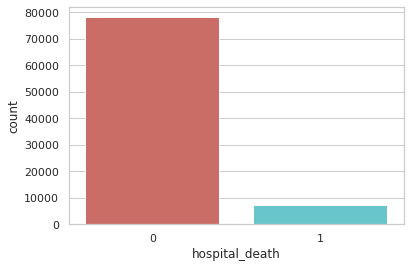

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot(x='hospital_death',data=df,palette='hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
count_no_died = len(df1[df1['hospital_death']==0])
count_died = len(df1[df1['hospital_death']==1])
pct_of_no_died = count_no_died/(count_no_died+count_died)
print("percentage of 'patients did not die'is", pct_of_no_died*100)
pct_of_died = count_died/(count_no_died+count_died)
print("percentage of 'patients died' is", pct_of_died*100)

percentage of 'patients did not die'is 91.5681703702836
percentage of 'patients died' is 8.4318296297164


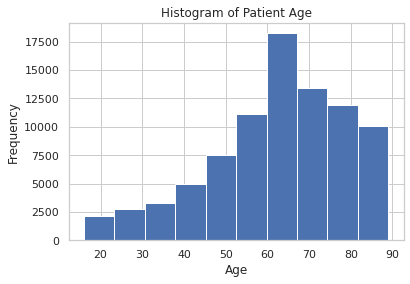

In [ ]:
df1.age.hist()
plt.title('Histogram of Patient Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [ ]:
df1.groupby('hospital_death').mean()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
hospital_death,,,,,,,,,,,,,,,,,,,
0,61.815710,29.249862,0.192775,169.724749,0.789598,84.283498,3.534892,5.576047,4.097916,0.130013,0.290486,0.000819,0.014264,0.228505,0.011757,0.024178,0.006371,0.003902,0.018626
1,68.125731,28.289413,0.066824,168.960497,1.370253,80.778612,2.655182,4.289108,2.756460,0.349680,0.668241,0.001389,0.032787,0.206585,0.028202,0.049736,0.015699,0.008336,0.044318


Observations:

*   The average age of a patient that died is ~6 years older than that of one that does not die.
*   The 3 gcs scores are all lower for patients that died vs. did not die (the higher the gcs score, (generally) the healthier the patient).
*   Patients that died are more likely to have been either intubated or ventilated than patients that did not die.






In [ ]:
pd.cut(df1['age'],bins=[16,20,30,40,50,60,70,80,np.inf])
age_groups = pd.cut(data['age'], bins=[16,20,30,40,50,60,70,80,np.inf])
pd.crosstab(age_groups, df1['hospital_death'])

hospital_death,0,1
age,,
"(16.0, 20.0]",976,24
"(20.0, 30.0]",3749,110
"(30.0, 40.0]",4656,189
"(40.0, 50.0]",7859,385
"(50.0, 60.0]",14535,982
"(60.0, 70.0]",17394,1607
"(70.0, 80.0]",16091,1875
"(80.0, inf]",10105,1516


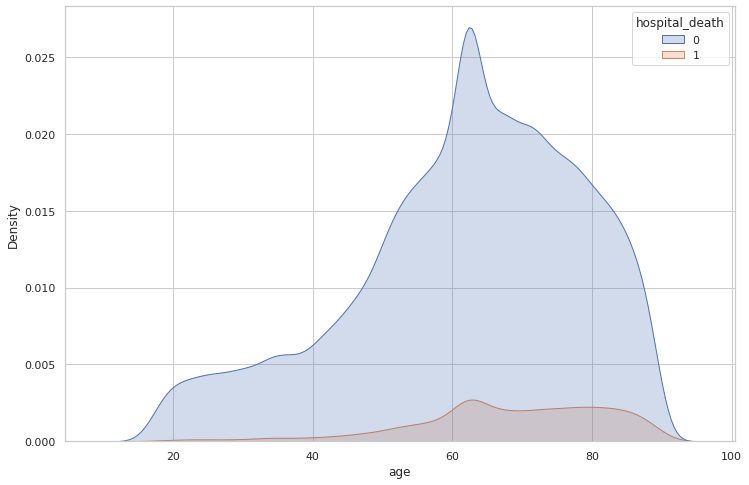

In [ ]:
# Outcome (patient died / patient did not die) density by age
plt.figure(figsize=(12,8))
sns.kdeplot(data=df1,x='age',hue='hospital_death',fill=True)

In [ ]:
df1.groupby('ethnicity').mean()

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
ethnicity,,,,,,,,,,,,,,,,,,,,
African American,0.076149,56.553315,30.022166,0.130940,170.674013,1.013062,87.096753,3.426591,5.384099,3.963659,0.130046,0.297998,0.002907,0.008834,0.260092,0.008163,0.023706,0.005815,0.002125,0.020127
Asian,0.082785,61.404923,25.477925,0.177799,162.243612,0.815036,66.956651,3.501411,5.444967,4.054563,0.129821,0.265287,0.000000,0.016933,0.264346,0.015052,0.024459,0.005644,0.005644,0.030103
Caucasian,0.085513,63.559196,29.164004,0.190876,170.042986,0.799315,84.376243,3.463626,5.481910,3.992782,0.149417,0.328944,0.000567,0.014913,0.215781,0.012572,0.027247,0.007487,0.004698,0.021386
Hispanic,0.091365,61.630092,28.383161,0.166814,165.727241,1.074246,78.065346,3.581491,5.539935,4.045682,0.176835,0.283820,0.000884,0.027115,0.250810,0.021810,0.021220,0.007663,0.002063,0.020336
Native American,0.089096,51.686748,31.018036,0.130319,168.448630,0.772028,88.042181,3.203457,5.264628,3.672872,0.190160,0.329787,0.001330,0.083777,0.343085,0.070479,0.026596,0.006649,0.003989,0.010638
Other/Unknown,0.076406,58.033114,28.663062,0.174676,166.636386,0.921728,79.498328,3.424796,5.398606,3.890678,0.148246,0.312830,0.001442,0.023787,0.279673,0.015137,0.021864,0.004805,0.003604,0.012494


Observations:

*   The average age of a patient varies considerably by ethnicity.
*   bmi varies considerably by ethnicity.


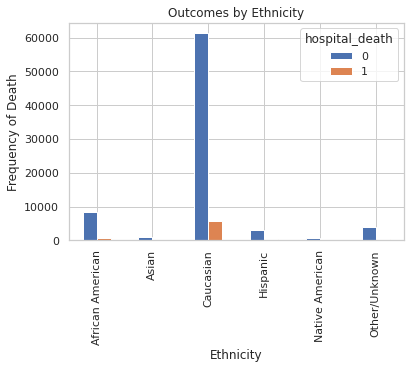

In [ ]:
# Outcome by ethicity
%matplotlib inline
pd.crosstab(df1.ethnicity ,df1.hospital_death).plot(kind='bar')
plt.title('Outcomes by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Frequency of Death')
plt.savefig('death_ethnicity')

In [ ]:
df1.groupby('gender').mean()

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
gender,,,,,,,,,,,,,,,,,,,,
F,0.086314,62.787944,29.54761,0.168427,161.691003,0.834292,77.230510,3.463003,5.485428,3.983786,0.136381,0.312063,0.000433,0.012930,0.221396,0.010945,0.026905,0.006058,0.003945,0.021687
M,0.082617,61.972467,28.84598,0.193859,176.454799,0.842194,89.749266,3.458767,5.452279,3.985677,0.158898,0.331098,0.001237,0.018294,0.231141,0.015017,0.025846,0.008095,0.004557,0.020030


In [ ]:
df1.groupby('elective_surgery').mean()

,hospital_death,age,bmi,height,pre_icu_los_days,weight,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
elective_surgery,,,,,,,,,,,,,,,,,,,
0,0.096209,61.812430,29.115017,169.539727,0.688921,83.689566,3.458785,5.461220,3.999914,0.120816,0.288554,0.00096,0.017703,0.226549,0.014996,0.027357,0.007835,0.004540,0.019709
1,0.030932,64.751306,29.410711,170.201701,1.510404,85.327768,3.469389,5.495884,3.916977,0.272990,0.474019,0.00045,0.007395,0.227138,0.004823,0.021736,0.004116,0.003087,0.025659


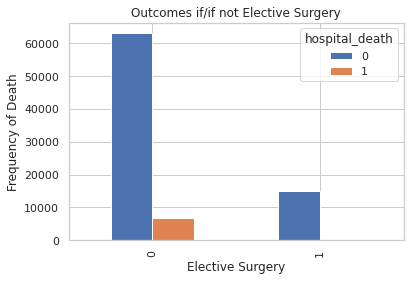

In [ ]:
# Outcome by elective surgery
%matplotlib inline
pd.crosstab(df1.elective_surgery ,df1.hospital_death).plot(kind='bar')
plt.title('Outcomes if/if not Elective Surgery')
plt.xlabel('Elective Surgery')
plt.ylabel('Frequency of Death')
plt.savefig('outcome_elective_surgery')

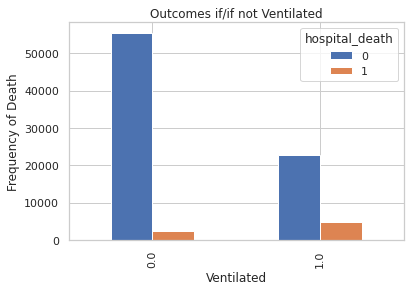

In [ ]:
# Outcome if ventilated
%matplotlib inline
pd.crosstab(df1.ventilated_apache ,df1.hospital_death).plot(kind='bar')
plt.title('Outcomes if/if not Ventilated')
plt.xlabel('Ventilated')
plt.ylabel('Frequency of Death')
plt.savefig('outcome_ventilated')

In [ ]:
dfc=df1[['hospital_death','age','bmi','height','pre_icu_los_days','weight']]
dfc.head()

,hospital_death,age,bmi,height,pre_icu_los_days,weight
0,0,68.0,22.73,180.3,0.541667,73.9
1,0,77.0,27.42,160.0,0.927778,70.2
2,0,25.0,31.95,172.7,0.000694,95.3
3,0,81.0,22.64,165.1,0.000694,61.7
5,0,67.0,27.56,190.5,0.000694,100.0


Feature Selection I - Continuous Variables

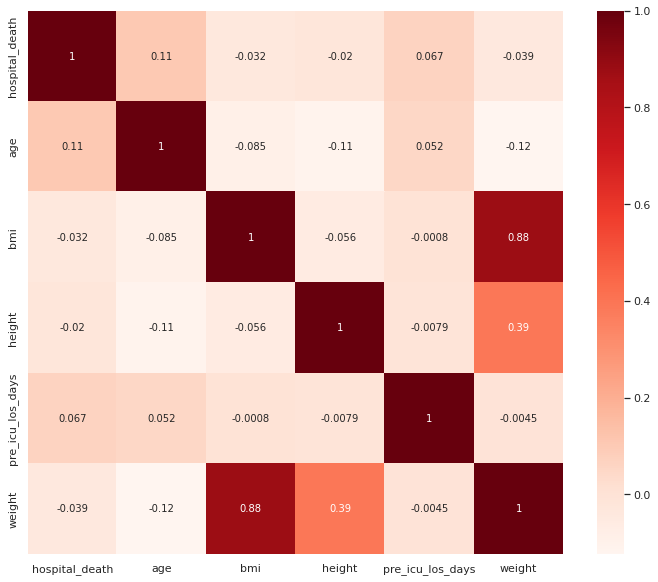

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = dfc.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
# List quantitative  features in descending order of correlation (absolute value) - note gcs_... are ordinal
dfc[dfc.columns[0:]].corr().abs()['hospital_death'][:].sort_values(ascending=False)

hospital_death      1.000000
age                 0.106644
pre_icu_los_days    0.067375
weight              0.038975
bmi                 0.032284
height              0.019674
Name: hospital_death, dtype: float64

In [ ]:
#Correlation with output variable
cor_target = abs(cor['hospital_death'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

hospital_death    1.0
Name: hospital_death, dtype: float64

None of the continuous features are even moderately correlated with the target variable (hospital_death). However, we will keep most of them in the model for now. 

In [ ]:
print(dfc[['weight','bmi']].corr())

          weight       bmi
weight  1.000000  0.877385
bmi     0.877385  1.000000


bmi is based on weight and height.  bmi and weight are highly correlated.  Weight is more highly correlated with the target variable, so we will drop bmi from the features. Height has a very weak/no correlation (-0.02) with hospital_death, so it will also be dropped from the features.

In [ ]:
# Drop features bmi and height
df1.drop(['bmi','height'],axis =1, inplace = True)

Feature Selection II - Ordinal and Categorical Variables

In [ ]:
x=df1[['elective_surgery', 'ethnicity', 'gender',
       'icu_admit_source', 'icu_stay_type', 'icu_type', 
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache',
       'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis',
       'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia',
       'lymphoma', 'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem']]
y=df1[['hospital_death']]


In [ ]:
oe=OrdinalEncoder()
oe.fit(x)
xen=oe.transform(x)

In [ ]:
y=y.values

In [ ]:
f_score=chi2(xen,y)   #returns f score and p value 
f_score

(array([5.74005266e+02, 4.90519407e-01, 1.72707140e+00, 5.91190106e+01,
        1.52145601e+01, 1.69202134e+01, 2.07288006e+03, 2.44345416e+03,
        3.97368076e+03, 2.14120343e+03, 2.91787156e+03, 2.47503105e+00,
        1.42892650e+02, 1.39720075e+01, 1.35630778e+02, 1.63490341e+02,
        8.01275079e+01, 3.03050357e+01, 2.09232368e+02, 9.56178417e+02,
        5.66829703e+02]),
 array([7.55212346e-127, 4.83695701e-001, 1.88785340e-001, 1.48418415e-014,
        9.59606911e-005, 3.89842367e-005, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.15667159e-001,
        6.20443860e-033, 1.85552759e-004, 2.40307092e-031, 1.95479203e-037,
        3.51011590e-019, 3.69166237e-008, 2.01995971e-047, 6.02160925e-210,
        2.74754475e-125]))

In [ ]:
# printing p values for each categorical features
p_value=pd.Series(f_score[1],index=x.columns)
p_value.sort_values(ascending=True,inplace=True)


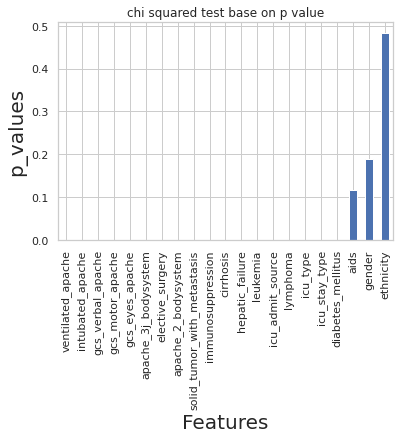

In [ ]:
p_value.plot(kind="bar")
plt.xlabel("Features",fontsize=20)
plt.ylabel("p_values",fontsize=20)
plt.title("chi squared test base on p value")
plt.show()

Observation:

The p-values of all the categorical/ordinal features are less than 0.5

In [ ]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(xen, y)
xen_fs = fs.transform(xen)

Feature 0: 574.005266
Feature 1: 0.490519
Feature 2: 1.727071
Feature 3: 59.119011
Feature 4: 15.214560
Feature 5: 16.920213
Feature 6: 2072.880062
Feature 7: 2443.454158
Feature 8: 3973.680761
Feature 9: 2141.203429
Feature 10: 2917.871559
Feature 11: 2.475031
Feature 12: 142.892650
Feature 13: 13.972007
Feature 14: 135.630778
Feature 15: 163.490341
Feature 16: 80.127508
Feature 17: 30.305036
Feature 18: 209.232368
Feature 19: 956.178417
Feature 20: 566.829703


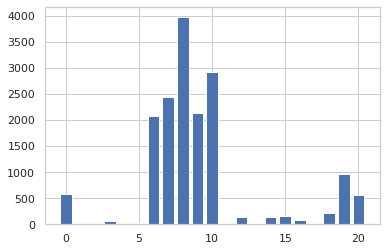

In [ ]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [ ]:
xcols = x.columns
xcols
xen_df=pd.DataFrame(xen, columns=[['elective_surgery', 'ethnicity', 'gender',
       'icu_admit_source', 'icu_stay_type', 'icu_type', 
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache',
       'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis',
       'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia',
       'lymphoma', 'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem']])


Categorical correlation with hospital_death

The features with the 10 highest chi_squared scores are:

1. gcs_verbal_apache: 3973.680761
2. ventilated_apache: 2917.871559
3. gcs_motor_apache: 2443.454158
4. intubated_apache: 2141.203429
5. gcs_eyes_apache: 2072.880062
6. apache_3j_bodysystem: 956.178417
7. apache_2_bodysystem: 647.666241
8. elective_surgery: 574.005266
9. solid_tumor_with_metastasis: 209.232368
10. immunosuppression: 163.490341

The features with the 11 lowest chi_squared scores are:
1. ethnicity: 0.490519
2. gender: 1.727071
3. aids: 2.475031
4. diabetes_melitus: 13.972007 
5. icu_stay_type: 15.214560
6. icu_type: 16.920213
7. lymphoma: 30.305036
8. icu_admit_source: 59.119011
9. leukemia: 80.127508
10. hepatic_failure: 135.630778
11. cirrhosis: 142.892650




In [ ]:
df_cat_v1=x

In [ ]:
df_cat_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85367 entries, 0 to 91712
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   elective_surgery             85367 non-null  int64  
 1   ethnicity                    85367 non-null  object 
 2   gender                       85367 non-null  object 
 3   icu_admit_source             85367 non-null  object 
 4   icu_stay_type                85367 non-null  object 
 5   icu_type                     85367 non-null  object 
 6   gcs_eyes_apache              85367 non-null  float64
 7   gcs_motor_apache             85367 non-null  float64
 8   gcs_verbal_apache            85367 non-null  float64
 9   intubated_apache             85367 non-null  float64
 10  ventilated_apache            85367 non-null  float64
 11  aids                         85367 non-null  float64
 12  cirrhosis                    85367 non-null  float64
 13  diabetes_mellitu

In [ ]:
#Review df1 dataframe before proceeding with removing features

analyse_df(df1)

General Info:
85367 Rows 25 Columns
0 Duplicated Rows
Memory Usage: 18.95Mb

Columns int64: ['hospital_death', 'elective_surgery']

Columns float64: ['age', 'pre_icu_los_days', 'weight', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']

Columns object: ['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']


,hospital_death,age,elective_surgery,pre_icu_los_days,weight,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000,85367.000000
mean,0.084318,62.347760,0.182155,0.838558,83.987972,3.460717,5.467534,3.984807,0.148535,0.322338,0.000867,0.015826,0.226657,0.013143,0.026333,0.007157,0.004276,0.020793
std,0.277866,16.441014,0.385974,2.394715,24.987825,0.953982,1.290691,1.564943,0.355632,0.467374,0.029430,0.124802,0.418671,0.113889,0.160126,0.084298,0.065249,0.142690
min,0.000000,16.000000,0.000000,0.000000,38.600000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,53.000000,0.000000,0.040278,66.700000,3.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,64.000000,0.000000,0.143750,80.300000,4.000000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,75.000000,0.000000,0.411111,97.070000,4.000000,6.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,89.000000,1.000000,84.367361,186.000000,4.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Checking Missing Values:
Analyzed DataFrame has no missing values

Checking Linear Correlation:
Linear Correlation found between columns gcs_motor_apache and gcs_eyes_apache -> Pearson coef. = 0.80
Linear Correlation found between columns gcs_verbal_apache and gcs_eyes_apache -> Pearson coef. = 0.78


We will exclude the features with the 11 lowest chi-squared scores from the model.  We will also remove gcs_eyes_apache as it highly correlated with both gcs_motor_apache and gcs_verbal_apache

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85367 entries, 0 to 91712
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hospital_death               85367 non-null  int64  
 1   age                          85367 non-null  float64
 2   elective_surgery             85367 non-null  int64  
 3   ethnicity                    85367 non-null  object 
 4   gender                       85367 non-null  object 
 5   icu_admit_source             85367 non-null  object 
 6   icu_stay_type                85367 non-null  object 
 7   icu_type                     85367 non-null  object 
 8   pre_icu_los_days             85367 non-null  float64
 9   weight                       85367 non-null  float64
 10  gcs_eyes_apache              85367 non-null  float64
 11  gcs_motor_apache             85367 non-null  float64
 12  gcs_verbal_apache            85367 non-null  float64
 13  intubated_apache

In [ ]:
# Create new dataset with features to be kept

dfnc=df1[['age','elective_surgery','pre_icu_los_days','weight','gcs_motor_apache','gcs_verbal_apache','intubated_apache','ventilated_apache','apache_3j_bodysystem','apache_2_bodysystem','solid_tumor_with_metastasis','immunosuppression','hospital_death']]

In [ ]:
dfnc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85367 entries, 0 to 91712
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          85367 non-null  float64
 1   elective_surgery             85367 non-null  int64  
 2   pre_icu_los_days             85367 non-null  float64
 3   weight                       85367 non-null  float64
 4   gcs_motor_apache             85367 non-null  float64
 5   gcs_verbal_apache            85367 non-null  float64
 6   intubated_apache             85367 non-null  float64
 7   ventilated_apache            85367 non-null  float64
 8   apache_3j_bodysystem         85367 non-null  object 
 9   apache_2_bodysystem          85367 non-null  object 
 10  solid_tumor_with_metastasis  85367 non-null  float64
 11  immunosuppression            85367 non-null  float64
 12  hospital_death               85367 non-null  int64  
dtypes: float64(9), i

In [ ]:
dfnc.head()

,age,elective_surgery,pre_icu_los_days,weight,gcs_motor_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,apache_3j_bodysystem,apache_2_bodysystem,solid_tumor_with_metastasis,immunosuppression,hospital_death
0,68.0,0,0.541667,73.9,6.0,4.0,0.0,0.0,Sepsis,Cardiovascular,0.0,0.0,0
1,77.0,0,0.927778,70.2,3.0,1.0,0.0,1.0,Respiratory,Respiratory,0.0,0.0,0
2,25.0,0,0.000694,95.3,6.0,5.0,0.0,0.0,Metabolic,Metabolic,0.0,0.0,0
3,81.0,1,0.000694,61.7,6.0,5.0,1.0,1.0,Cardiovascular,Cardiovascular,0.0,0.0,0
5,67.0,0,0.000694,100.0,6.0,5.0,0.0,0.0,Neurological,Neurologic,0.0,0.0,0


In [ ]:
dfnc.columns

Index(['age', 'elective_surgery', 'pre_icu_los_days', 'weight',
       'gcs_motor_apache', 'gcs_verbal_apache', 'intubated_apache',
       'ventilated_apache', 'apache_3j_bodysystem', 'apache_2_bodysystem',
       'solid_tumor_with_metastasis', 'immunosuppression', 'hospital_death'],
      dtype='object')

In [ ]:
#Convert categorical variable into dummy/indicator variables

cat_cols=['gcs_motor_apache', 'gcs_verbal_apache',  'apache_3j_bodysystem', 'apache_2_bodysystem']


# Create a copy of the data frame in memory with a different name
df3=dfnc.copy()
#convert only categorical variables/features to dummy/one-hot features
df3 = pd.get_dummies(dfnc, columns=cat_cols, prefix = cat_cols)
df3.head()

,age,elective_surgery,pre_icu_los_days,weight,intubated_apache,ventilated_apache,solid_tumor_with_metastasis,immunosuppression,hospital_death,gcs_motor_apache_1.0,...,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined diagnoses
0,68.0,0,0.541667,73.9,0.0,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,77.0,0,0.927778,70.2,0.0,1.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,25.0,0,0.000694,95.3,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,81.0,1,0.000694,61.7,1.0,1.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,67.0,0,0.000694,100.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
X=df3.drop('hospital_death', axis=1)
y=df3['hospital_death']
X.shape, y.shape


((85367, 39), (85367,))

In [ ]:
#Scale the numeric features

con_vars=['age','pre_icu_los_days','weight']
object= StandardScaler()
X[con_vars] = object.fit_transform(X[con_vars])
X.head(10)

,age,elective_surgery,pre_icu_los_days,weight,intubated_apache,ventilated_apache,solid_tumor_with_metastasis,immunosuppression,gcs_motor_apache_1.0,gcs_motor_apache_2.0,...,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined diagnoses
0,0.343791,0,-0.123978,-0.403718,0.0,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.891206,0,0.037257,-0.551791,0.0,1.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-2.271635,0,-0.349882,0.452704,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.134501,1,-0.349882,-0.891959,1.0,1.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0.282967,0,-0.349882,0.640797,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,-0.203624,0,-0.349882,2.905913,1.0,1.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,-0.751038,0,-0.324943,-0.199617,0.0,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
10,0.587086,1,-0.348142,-0.647838,0.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,1.073677,1,0.180803,-0.555793,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
14,1.134501,1,0.224592,1.197071,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [107]:
# Revisit class imbalance

df3['hospital_death'].value_counts()

0    78169
1     7198
Name: hospital_death, dtype: int64

In [ ]:
# Apply SMOTE (Synthetic Minority Oversampling Technique)
# Borderline SMOTE uses a Support Vector Machine model (SVM) to calculate the 
# decision boundary, compared to the K nearest neighbours (KNN) model used in regular SMOTE.

oversampled = BorderlineSMOTE(random_state=0)
X_train_smote, y_train_smote = oversampled.fit_resample(X, y)

In [ ]:
y_train_smote.value_counts()

0    78169
1    78169
Name: hospital_death, dtype: int64

In [ ]:
X=X_train_smote
y=y_train_smote

In [ ]:
# Feature selection using Recursive Feature Elimination with Cross Validation and Random Forest estimator  
# create a random forest model
rf = RandomForestClassifier(random_state=42)

# Recursively eliminate features with cross validation
rfecv = RFECV(estimator=rf, cv=10, scoring='roc_auc')
rfecv.fit(X, y)
X_new = rfecv.transform(X)
print("Num Features Before:", X.shape[1])
print("Num Features After:", X_new.shape[1])

Num Features Before: 39
Num Features After: 36


In [ ]:
features_kept = pd.DataFrame({'columns': X.columns,'Kept': rfecv.support_})
features_kept

,columns,Kept
0,age,True
1,elective_surgery,True
2,pre_icu_los_days,True
3,weight,True
4,intubated_apache,True
5,ventilated_apache,True
6,solid_tumor_with_metastasis,True
7,immunosuppression,True
8,gcs_motor_apache_1.0,True
9,gcs_motor_apache_2.0,True


In [ ]:
#List the features to keep for model
X_new_df = X.iloc[:, rfecv.support_]
X_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156338 entries, 0 to 156337
Data columns (total 36 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   age                                      156338 non-null  float64
 1   elective_surgery                         156338 non-null  int64  
 2   pre_icu_los_days                         156338 non-null  float64
 3   weight                                   156338 non-null  float64
 4   intubated_apache                         156338 non-null  float64
 5   ventilated_apache                        156338 non-null  float64
 6   solid_tumor_with_metastasis              156338 non-null  float64
 7   immunosuppression                        156338 non-null  float64
 8   gcs_motor_apache_1.0                     156338 non-null  uint8  
 9   gcs_motor_apache_2.0                     156338 non-null  uint8  
 10  gcs_motor_apache_3.0            

In [ ]:
X_new_df = X.iloc[:, rfecv.support_]
X_new_df.head()

,age,elective_surgery,pre_icu_los_days,weight,intubated_apache,ventilated_apache,solid_tumor_with_metastasis,immunosuppression,gcs_motor_apache_1.0,gcs_motor_apache_2.0,...,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined diagnoses
0,0.343791,0,-0.123978,-0.403718,0.0,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.891206,0,0.037257,-0.551791,0.0,1.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-2.271635,0,-0.349882,0.452704,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.134501,1,-0.349882,-0.891959,1.0,1.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.282967,0,-0.349882,0.640797,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
print("Optimum number of features: %d" % rfecv.n_features_)

Optimum number of features: 36


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


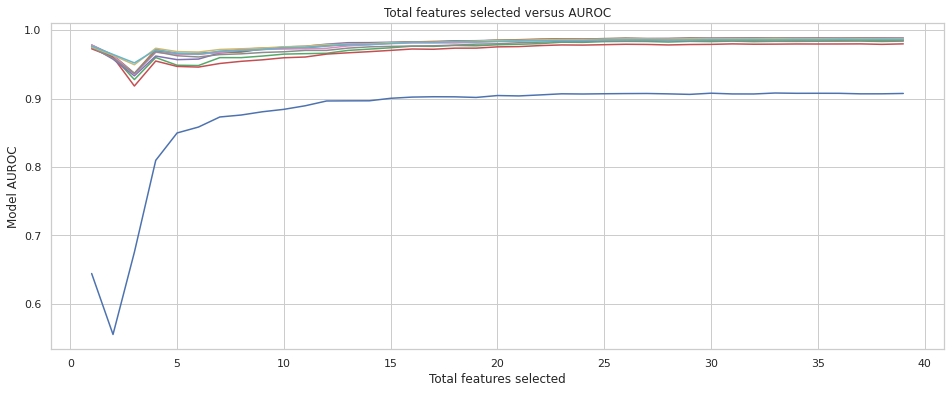

In [ ]:
plt.figure( figsize=(16, 6))
plt.title('Total features selected versus AUROC')
plt.xlabel('Total features selected')
plt.ylabel('Model AUROC')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


In [ ]:
logit_model=sm.Logit(y,X_new_df)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.437908
         Iterations 8
                                     Results: Logit
Model:                      Logit                   Pseudo R-squared:        0.368      
Dependent Variable:         hospital_death          AIC:                     136985.1970
Date:                       2022-12-02 22:48        BIC:                     137293.9500
No. Observations:           156338                  Log-Likelihood:          -68462.    
Df Model:                   30                      LL-Null:                 -1.0837e+05
Df Residuals:               156307                  LLR p-value:             0.0000     
Converged:                  1.0000                  Scale:                   1.0000     
No. Iterations:             8.0000                                                      
----------------------------------------------------------------------------------------
                                         Coef

The p-value for apache_3j_bodysystem_Gastrointestinal is greater than 0.05, so it will be removed.  All other features have p-values smaller than 0.05 

In [ ]:
X_new_df.columns

Index(['age', 'elective_surgery', 'pre_icu_los_days', 'weight',
       'intubated_apache', 'ventilated_apache', 'solid_tumor_with_metastasis',
       'immunosuppression', 'gcs_motor_apache_1.0', 'gcs_motor_apache_2.0',
       'gcs_motor_apache_3.0', 'gcs_motor_apache_4.0', 'gcs_motor_apache_5.0',
       'gcs_motor_apache_6.0', 'gcs_verbal_apache_1.0',
       'gcs_verbal_apache_2.0', 'gcs_verbal_apache_3.0',
       'gcs_verbal_apache_4.0', 'gcs_verbal_apache_5.0',
       'apache_3j_bodysystem_Cardiovascular',
       'apache_3j_bodysystem_Gastrointestinal',
       'apache_3j_bodysystem_Genitourinary', 'apache_3j_bodysystem_Metabolic',
       'apache_3j_bodysystem_Neurological', 'apache_3j_bodysystem_Respiratory',
       'apache_3j_bodysystem_Sepsis', 'apache_3j_bodysystem_Trauma',
       'apache_2_bodysystem_Cardiovascular',
       'apache_2_bodysystem_Gastrointestinal',
       'apache_2_bodysystem_Haematologic', 'apache_2_bodysystem_Metabolic',
       'apache_2_bodysystem_Neurologic',
 

In [ ]:
 X2_df=X_new_df[['age', 'elective_surgery', 'pre_icu_los_days', 'weight',
       'intubated_apache', 'ventilated_apache', 'solid_tumor_with_metastasis',
       'immunosuppression', 'gcs_motor_apache_1.0', 'gcs_motor_apache_4.0',
       'gcs_motor_apache_5.0', 'gcs_motor_apache_6.0', 'gcs_verbal_apache_1.0',
       'gcs_verbal_apache_4.0', 'gcs_verbal_apache_5.0',
       'apache_3j_bodysystem_Cardiovascular',
       'apache_3j_bodysystem_Metabolic', 'apache_3j_bodysystem_Sepsis',
       'apache_2_bodysystem_Cardiovascular', 'apache_2_bodysystem_Neurologic',
       'apache_2_bodysystem_Respiratory']]

Logistic Regresssion with Stratified K-Fold CV

[0.84311166 0.89191208 0.8707839  0.85390542 0.87834291 0.89325687
 0.88384687 0.87606953 0.8836302  0.87601112]
AUROC: 0.875 (0.015)
Confusion Matrix: 


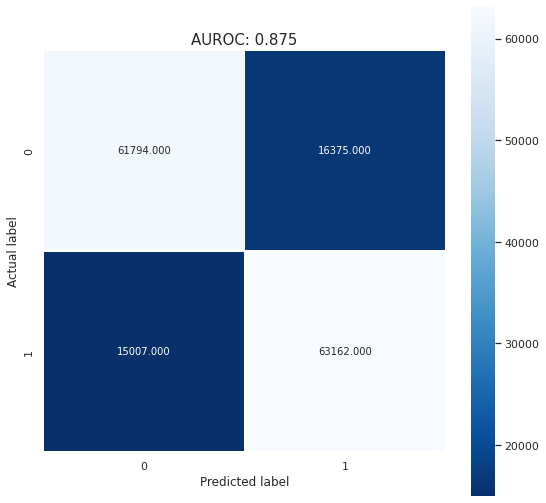

In [ ]:
logR = LogisticRegression(solver='liblinear')
lscore = cross_val_score(logR, X2_df, y, scoring='roc_auc', cv=10, n_jobs=-1) 
print(lscore)
print('AUROC: %.3f (%.3f)' % (lscore.mean(), lscore.std()))
y_predl = cross_val_predict(logR, X2_df, y, cv=10)
#Confusion Matrix
conf_mat = confusion_matrix(y, y_predl)
print('Confusion Matrix: ')
lrmean = round(lscore.mean(),3)
lrstd = round(lscore.std(),3)
plt.figure(figsize=(9,9))
sns.heatmap(conf_mat, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'AUROC: {0}'.format(lrmean)
plt.title(all_sample_title, size = 15);

In [ ]:
print(classification_report(y, y_predl))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80     78169
           1       0.79      0.81      0.80     78169

    accuracy                           0.80    156338
   macro avg       0.80      0.80      0.80    156338
weighted avg       0.80      0.80      0.80    156338



In [ ]:
logit_model=sm.Logit(y,X2_df)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.443499
         Iterations 7
                                   Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.360      
Dependent Variable:       hospital_death         AIC:                    138713.5663
Date:                     2022-12-02 22:48       BIC:                    138922.7216
No. Observations:         156338                 Log-Likelihood:         -69336.    
Df Model:                 20                     LL-Null:                -1.0837e+05
Df Residuals:             156317                 LLR p-value:            0.0000     
Converged:                1.0000                 Scale:                  1.0000     
No. Iterations:           7.0000                                                    
------------------------------------------------------------------------------------
                                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975

In [ ]:
clf = LogisticRegressionCV(cv=10, random_state=27, scoring='roc_auc').fit(X2_df, y)
clf.score(X2_df, y)

0.8767352934396844

In [ ]:
crossval_scores = cross_val_score(LogisticRegression(), X2_df, y, scoring='roc_auc', cv=10)

In [ ]:
crossval_scores.mean()

0.8750886155107054

In [ ]:
phd=clf.predict_proba(X2_df)
s=pd.DataFrame(phd)
s.head(10)

,0,1
0,0.460316,0.539684
1,0.034091,0.965909
2,0.995717,0.004283
3,0.783659,0.216341
4,0.880376,0.119624
5,0.605549,0.394451
6,0.903695,0.096305
7,0.943637,0.056363
8,0.933793,0.066207
9,0.957879,0.042121


In [ ]:
y_pred = clf.predict(X2_df)
print('AUROC of logistic regression classifier on test set: {:.2f}'.format(clf.score(X2_df, y)))


AUROC of logistic regression classifier on test set: 0.88


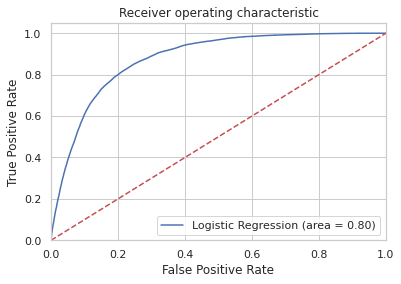

In [ ]:
logit_roc_auc = roc_auc_score(y, clf.predict(X2_df))
fpr, tpr, thresholds = roc_curve(y, clf.predict_proba(X2_df)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
cv = StratifiedKFold(n_splits=10,shuffle=False)

<ipython-input-106-565f64f6e81f>:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-106-565f64f6e81f>:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-106-565f64f6e81f>:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-106-565f64f6e81f>:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-106-565f64f6e81f>:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-106-565f64f6e81f>:18: DeprecationWarning: scipy.in

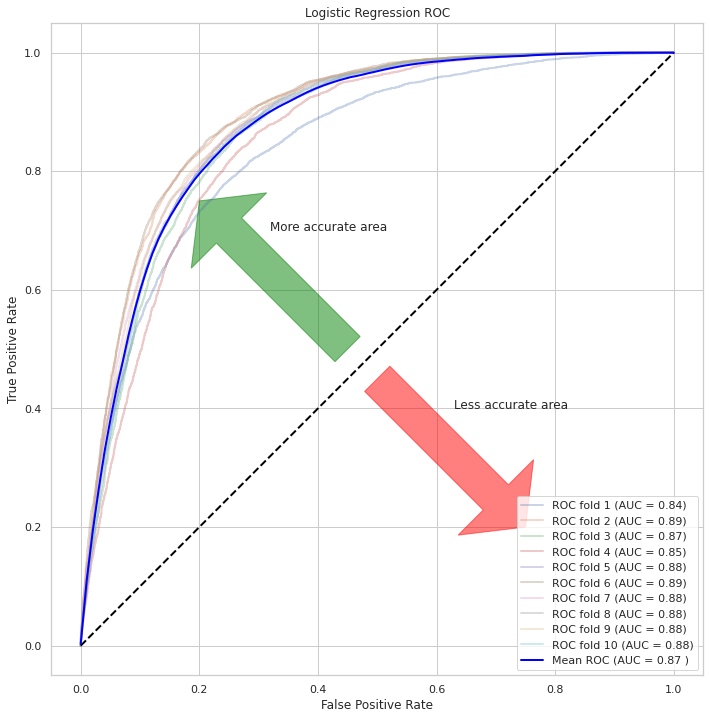

In [106]:
# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X2_df,y):
    prediction = clf.fit(X2_df.iloc[train],y.iloc[train]).predict_proba(X2_df.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

Gaussian Naive Bayes with Stratified K-Fold CV

[0.82411139 0.86016785 0.83425422 0.82016712 0.86627317 0.87062629
 0.84965871 0.84042164 0.85479579 0.85068965]
AUROC: 0.847 (0.016)
Confusion Matrix: 


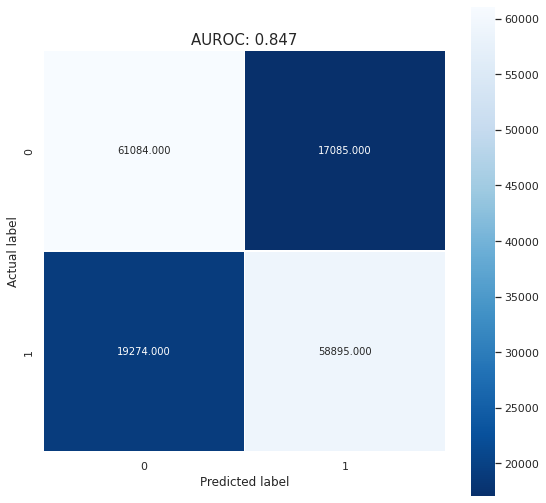

In [ ]:
naiveB = GaussianNB()
score = cross_val_score(naiveB, X2_df, y, scoring='roc_auc', cv=10, n_jobs=-1) 
print(score)
print('AUROC: %.3f (%.3f)' % (score.mean(), score.std()))
y_predn = cross_val_predict(naiveB, X2_df, y, cv=10)
#Confusion Matrix
conf_mat = confusion_matrix(y, y_predn)
print('Confusion Matrix: ')
nbmean = round(score.mean(),3)
nbstd = round(score.std(),3)
plt.figure(figsize=(9,9))
sns.heatmap(conf_mat, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'AUROC: {0}'.format(nbmean)
plt.title(all_sample_title, size = 15);

In [96]:
gnb2 = GaussianNB()
cv = StratifiedKFold(n_splits=10,shuffle=False)

<ipython-input-104-e1c64341821f>:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-104-e1c64341821f>:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-104-e1c64341821f>:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-104-e1c64341821f>:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-104-e1c64341821f>:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-104-e1c64341821f>:18: DeprecationWarning: scipy.in

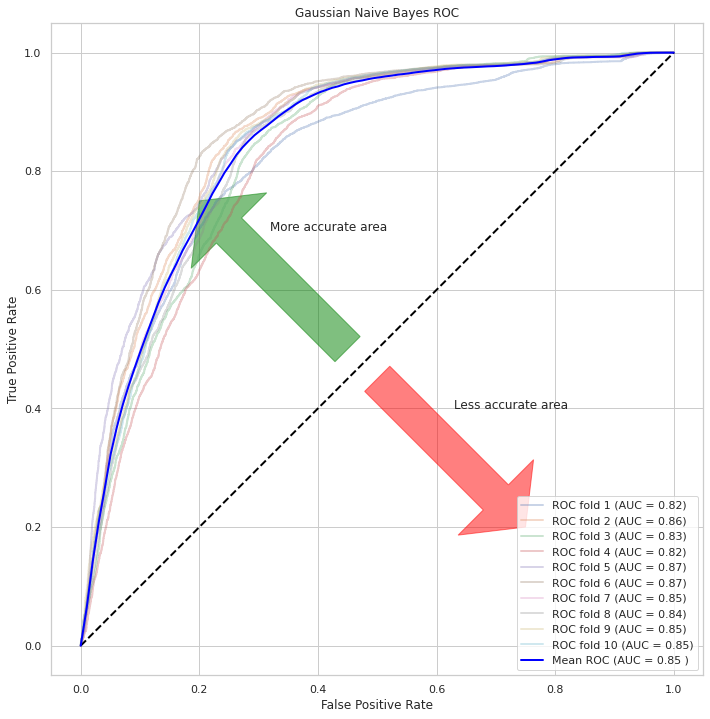

In [104]:
# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X2_df,y):
    prediction = gnb2.fit(X2_df.iloc[train],y.iloc[train]).predict_proba(X2_df.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Naive Bayes ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [ ]:
print(classification_report(y, y_predn))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77     78169
           1       0.78      0.75      0.76     78169

    accuracy                           0.77    156338
   macro avg       0.77      0.77      0.77    156338
weighted avg       0.77      0.77      0.77    156338



XGBoost with Stratified K-Fold CV

[0.8600324  0.92550336 0.90910839 0.89357462 0.92958466 0.92820031
 0.92499392 0.91306612 0.92315509 0.91854176]
AUROC: 0.913 (0.020)
Confusion Matrix: 


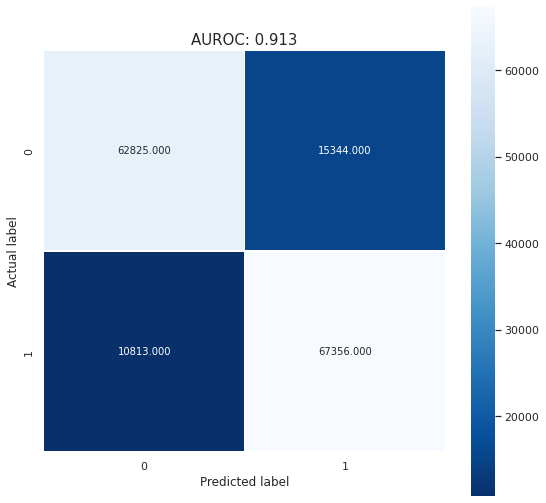

In [ ]:
classifier = XGBClassifier()
accuracies = cross_val_score(estimator = classifier, X=X2_df, y=y, cv = 10, scoring='roc_auc')
print(accuracies)
print('AUROC: %.3f (%.3f)' % (accuracies.mean(), accuracies.std()))
# How to train XG Boost
classifier.fit(X2_df, y)
y_predx = cross_val_predict(classifier, X2_df, y, cv=10)
#Confusion Matrix
conf_mat = confusion_matrix(y, y_predx)
print('Confusion Matrix: ')
nbmean = round(accuracies.mean(),3)
nbstd = round(accuracies.std(),3)
plt.figure(figsize=(9,9))
sns.heatmap(conf_mat, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'AUROC: {0}'.format(nbmean)
plt.title(all_sample_title, size = 15);

In [ ]:
print(classification_report(y, y_predx))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83     78169
           1       0.81      0.86      0.84     78169

    accuracy                           0.83    156338
   macro avg       0.83      0.83      0.83    156338
weighted avg       0.83      0.83      0.83    156338



<ipython-input-105-42159c85dc50>:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-105-42159c85dc50>:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-105-42159c85dc50>:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-105-42159c85dc50>:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-105-42159c85dc50>:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-105-42159c85dc50>:18: DeprecationWarning: scipy.in

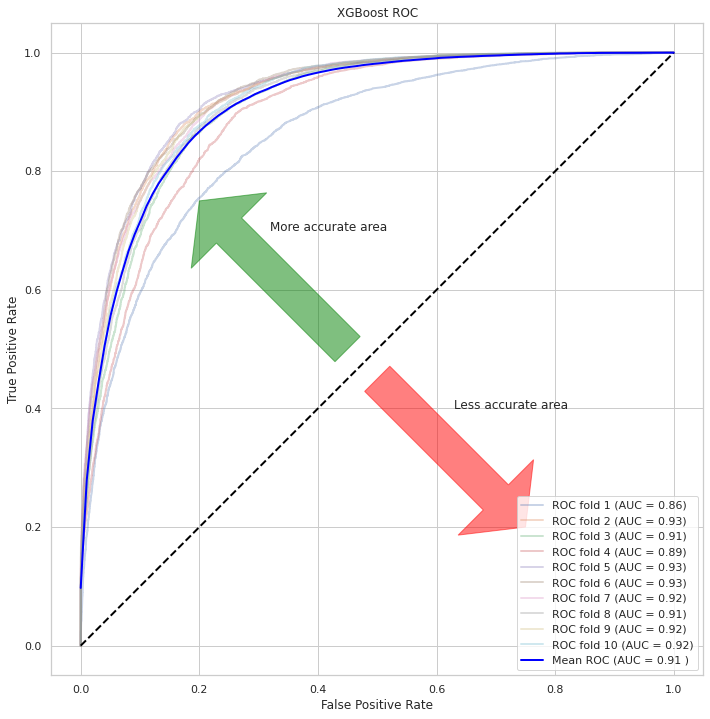

In [105]:
# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X2_df,y):
    prediction = classifier.fit(X2_df.iloc[train],y.iloc[train]).predict_proba(X2_df.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()